# Crop Yield Prediction

## 1.Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
df = pd.read_csv('yield_df.csv')
df.head(4)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [5]:
df = df.drop(columns=['Unnamed: 0','Area','Year'],axis=1)

In [6]:
df.head(4)

,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Maize,36613,1485.0,121.0,16.37
1,Potatoes,66667,1485.0,121.0,16.37
2,"Rice, paddy",23333,1485.0,121.0,16.37
3,Sorghum,12500,1485.0,121.0,16.37


In [7]:
df['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item                           28242 non-null  object 
 1   hg/ha_yield                    28242 non-null  int64  
 2   average_rain_fall_mm_per_year  28242 non-null  float64
 3   pesticides_tonnes              28242 non-null  float64
 4   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

Item                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
df.duplicated().sum()

2313

In [11]:
df.drop_duplicates(inplace=True)

## 2.Feature Engineering 

In [12]:
X = df.drop(columns= ['hg/ha_yield'],axis =1 )
y = df['hg/ha_yield']

In [13]:
X.sample(3)

,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
25854,"Rice, paddy",1712.0,1112.8,26.88
23867,Sorghum,637.0,9427.4,12.44
26150,Maize,1537.0,2170.4,8.15


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=41)
X_train.shape, X_test.shape

((19446, 4), (6483, 4))

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()
le.fit(X_train['Item'])
X_train['Item'] = le.transform(X_train['Item'])
X_test['Item'] = le.transform(X_test['Item'])

processor = ColumnTransformer(
    transformers=[
        
        ('Standard_scaler',scaler,[1,2,3])
    ],
    remainder='passthrough'
)

In [16]:
X_train_pro = processor.fit_transform(X_train)
X_test_pro  = processor.transform(X_test)

In [17]:
X_test

,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
3873,5,1761.0,214725.00,21.59
28240,7,657.0,2550.07,19.76
8077,8,2274.0,6471.77,17.28
1188,1,534.0,34200.00,12.10
24027,5,1212.0,152.00,19.35
...,...,...,...,...
4147,1,1761.0,304031.00,25.44
3211,7,1761.0,101621.67,24.28
19928,8,758.0,51741.99,21.42
13697,1,1083.0,28707.01,26.68


In [18]:
X_test_pro

array([[ 0.85754542,  3.19940194,  0.18283   ,  5.        ],
       [-0.68270411, -0.56428782, -0.10108907,  7.        ],
       [ 1.57325919, -0.49472229, -0.4858537 ,  8.        ],
       ...,
       [-0.5417936 ,  0.30830879,  0.156455  ,  8.        ],
       [-0.08836869, -0.10029989,  0.97252837,  1.        ],
       [-0.75106663, -0.55393858, -1.74564758,  3.        ]])

## 3.Model Building

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# Assuming you have X_train_pro, y_train, X_test_pro, y_test defined

# Define base models
base_models = [
    ('lr', LinearRegression()),
    ('dtr', DecisionTreeRegressor(random_state=41)),
    ('lasso', Lasso(random_state=19)),
    ('ridge', Ridge(random_state=19)),
    ('rf', RandomForestRegressor(random_state=41)),
    ('knn', KNeighborsRegressor()),
    ('gbr', GradientBoostingRegressor(random_state=41))
]

# Define meta-learner
meta_learner = RandomForestRegressor()  

# Define stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_learner)

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'gbr__n_estimators': [100, 200, 300, 400, 500],
    'gbr__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gbr__max_depth': [3, 4, 5, 6],
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_depth': [None, 10, 20, 30],
    'knn__n_neighbors': [3, 5, 7, 9, 11]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(stacking_regressor, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_pro, y_train)

# Get the best model
best_stacking_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_stacking = best_stacking_model.predict(X_test_pro)

# Evaluate the best model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)

print(f"Stacking (RandomizedSearchCV) MSE: {mse_stacking} -> score: {r2_stacking} -> Absolute_error: {rmse_stacking}")

Stacking (RandomizedSearchCV) MSE: 274034937.85999566 -> score: 0.9612920845026337 -> Absolute_error: 16554.000660263235


### Visualizing the results

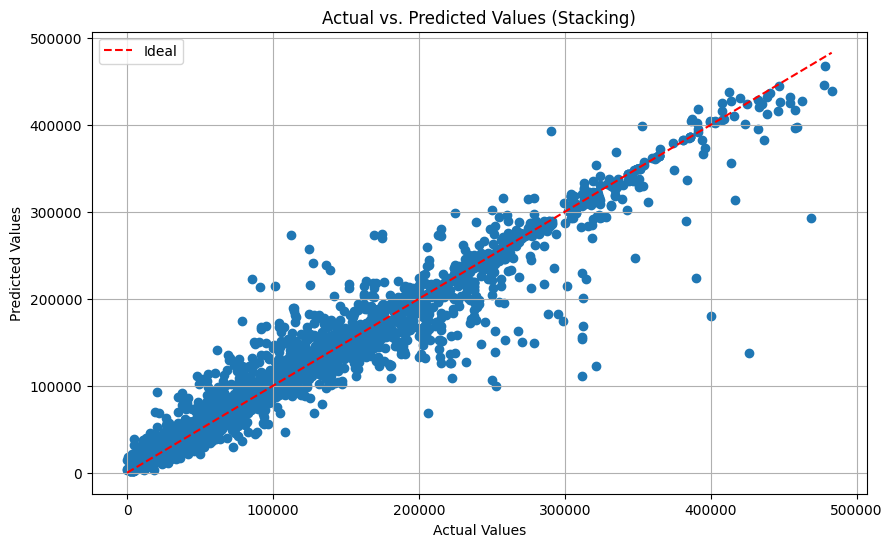

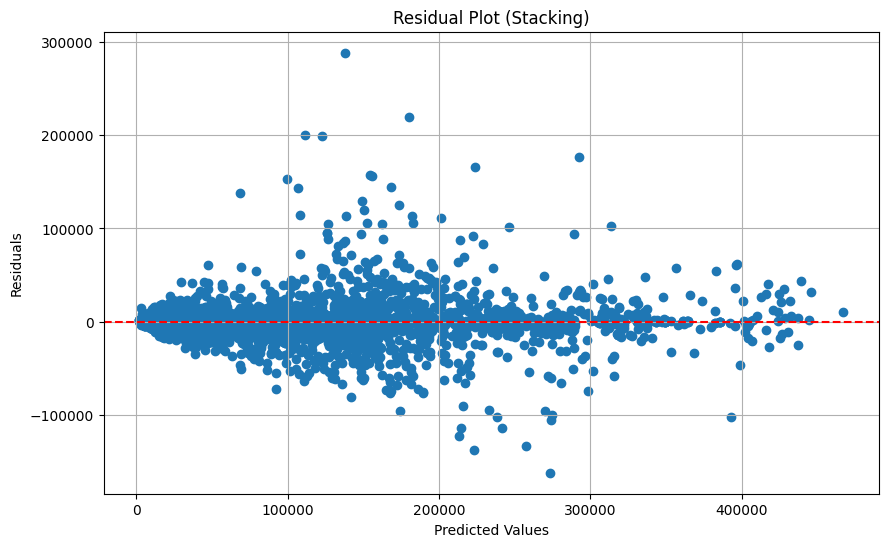

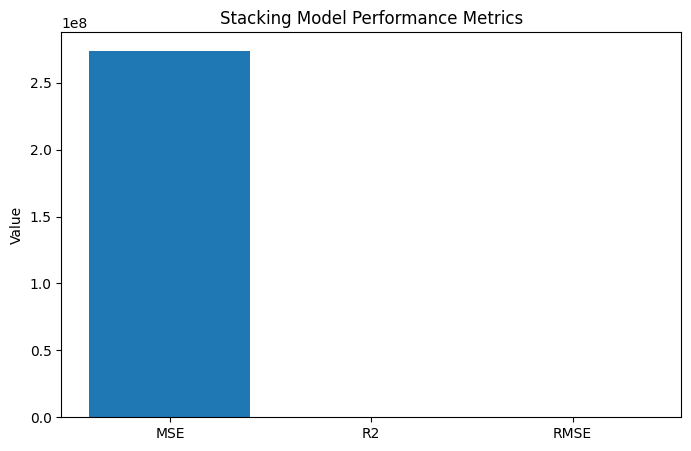

In [20]:
from matplotlib import pyplot as plt

# 1. Predicted vs. Actual Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacking)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Stacking)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred_stacking
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_stacking, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Stacking)")
plt.grid(True)
plt.show()

# 3. Bar plot for metrics
metrics = {'MSE': mse_stacking, 'R2': r2_stacking, 'RMSE': rmse_stacking}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values())
plt.ylabel("Value")
plt.title("Stacking Model Performance Metrics")
plt.show()

## 4.Define Prediction function

In [26]:
def prediction( average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Item):
    # Create an array of the input features
    features = np.array([[average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp,Item]], dtype=object)

    # Transform the features using the preprocessor
    features[:,3] = le.transform(features[:,3])
    transformed_features = processor.transform(features)

    # Make the prediction
    predicted_yield = best_stacking_model.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0][0]


average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Item = 'Maize'
result = prediction(average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Item)

print(result)

88233.7


c:\Users\asus\anaconda\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
print(f"The predicted yield for {Item} with {average_rain_fall_mm_per_year} average rainfall, {pesticides_tonnes} tonnes of pesticides, and {avg_temp} average temperature is {result} hg/ha")

NameError: name 'Item' is not defined

In [ ]:
import job
joblib.dump(best_stacking_model, 'yield_prediction_model.pkl') #Model
joblib.dump(le, 'label_encoder.pkl') #LAbel Encoding
joblib.dump(processor, 'data_processor.pkl') #Scaling

['data_processor.pkl']